# Calling Required Libaries 

In [1]:
import numpy as np
import pandas as pd

# Loading the CSV (Tabular Data) 

In [2]:
csv_data='data.csv'
df=pd.read_csv(csv_data)
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


# Preparing/Cleaning the Data

I have Columns with unorganized manner, e.g.,   -- Engine Fule Type--   has spaces and all capital, but --Driven_Wheels--   has underscore instead of space. Similarly --highway MPG--   is with small letters. So let's Even This

In [3]:
# Column function in pandas
df.columns=df.columns.str.lower().str.replace(" ", "_")
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Similar problem is with rows, let's correct them 

In [4]:
strings=df.dtypes[df.dtypes=='object'].keys()
strings

# There methods for this 

#strings=list(df.dtypes[df.dtypes=='object'].index)

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [5]:
for i in strings:
    df[i]=df[i].str.lower().str.replace(" ", "_")
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

In [6]:
for col in df.columns:
    print(col)
    #print(df.msrp.head())
    #print(df.msrp.unique()[:5])
    print(df.msrp.nunique())
    print()

make
6049

model
6049

year
6049

engine_fuel_type
6049

engine_hp
6049

engine_cylinders
6049

transmission_type
6049

driven_wheels
6049

number_of_doors
6049

market_category
6049

vehicle_size
6049

vehicle_style
6049

highway_mpg
6049

city_mpg
6049

popularity
6049

msrp
6049



#### Price Distribution 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

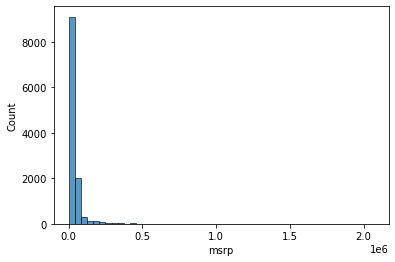

In [8]:
#sns.histplot(df.msrp) #It will plot the histogram with defualt bars
sns.histplot(df.msrp, bins=50)

This is <font color='red'>$\textbf{Long}$ $\textbf{Tail}$ $\textbf{distribution}$</font> because all the data is on left side but very little on right. 

<AxesSubplot:xlabel='msrp', ylabel='Count'>

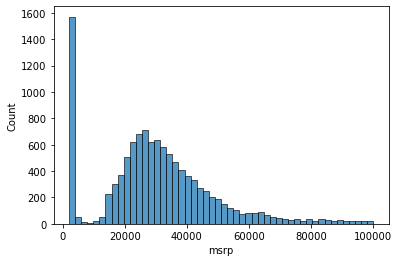

In [9]:
#Lets remove the tail of it
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

Still there is a long bar on the left and very small on the right. The solution for this is <font color='Blue'>$\textbf{Logrithmic}$ $\textbf{distribution}$</font>. 

In [10]:
np.log([1, 10, 100, 1000, 100000])

array([ 0.        ,  2.30258509,  4.60517019,  6.90775528, 11.51292546])

In <font color='blue'>$\textbf{np.log}$</font> function we can not have the <font color='blue'>$\textbf{log}$</font> of <font color='green'>$\textbf{0}$</font>. So to solve this let's add one to each value.

In [11]:
np.log([0+1, 1+1, 10+1, 100+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

Adding to every value could be tiresome. Fortunately we have built in funtion of Numpy to do the same for us.

In [12]:
np.log1p([0, 1, 10, 100, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

I have the same results as above. 

In [13]:
#Lets put the price column in this function
#price_logs=np.log1p([df.msrp])
price_logs=np.log1p(df.msrp.values)
price_logs

array([10.73934884, 10.61277871, 10.50097699, ..., 10.83212179,
       10.83803069, 10.27491317])

<AxesSubplot:ylabel='Count'>

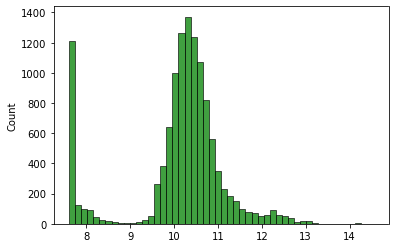

In [14]:
#Lets draw it again now
sns.histplot(price_logs, bins=50, color='g')


Now the $\textbf{Long Tail}$ is gone and the shape of the bars resembles with normal distribution. 

In [15]:
#Finding the Missing Values from Column
df.isnull().head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#Let's make it more useful
df.isnull().sum()
#Below is the summary of Missing values from Columns

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting Up Data for Model/ Setting Up Validation Framwork 

In [17]:
#Total Number of Rows in our dataset
n=len(df)
n

11914

Conventionaly we split data: Training=60%, Validation=20%, Testing=20% 

In [18]:
val_data=int(n*0.2)
test_data=int(n*0.2)
train_data=n-val_data-test_data

In [19]:
n, val_data+test_data+train_data 

(11914, 11914)

In [20]:
val_data, test_data, train_data

(2382, 2382, 7150)

The upper split cannot differentiate which data will be for validation or test or train. It will serve the data again to next split even it was served to previous. 

In [21]:
#The following method for to seperate data for train, val and test

df_train=df.iloc[:train_data] #it will go to strat to end of train data which is 7150th row
df_val=df.iloc[train_data:train_data+val_data]  #starts from 7150th row and end at 7150+2382 th row
df_test=df.iloc[train_data+val_data:]  #starts from 7150+2382 th row and end is all the remaining data (which is 7150+2382+2382)
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


I still have problem with this data: this is a sequential data and follows an order. All the BMWs are in the training and porche in validation and other in testing.

The first thing is to break the order of our data and shuffles the rows so they can divided into all three portions. 

In [22]:
# use a numpy function called arange

idx=np.arange(n) #n is the length of our dataset len(df)

#Now we can shuffle these indexes by using numpy random.shuffle function
np.random.seed(2)  #it will produce the same values runing every time
np.random.shuffle(idx)  #indexs shuffled (means rows are shuffled)

In [23]:
# now add index to all of the portions 


df_train=df.iloc[idx[:train_data]] #it will go to strat to end of train data which is 7150th row
df_val=df.iloc[idx[train_data:train_data+val_data]]  #starts from 7150th row and end at 7150+2382 th row
df_test=df.iloc[idx[train_data+val_data:]]  #starts from 7150+2382 th row and end is all the remaining data (which is 7150+2382+2382)

In [24]:
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


For me the index is not good, it don't look smooth, let's reset it.

In [25]:
df_train.reset_index()

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


Now a new column with the name of index is added in our dataset. Let's remove it

In [26]:
df_train=df_train.reset_index(drop=True)
len(df_train)

7150

It's perfect now!!

In [27]:
# Let's Reset the indexes of other two portions as well

df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

It's time to make some tranformations with y as well

In [28]:
np.log1p(df_train.msrp)

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

In [29]:
#convert this series into a numpy array by using pandas's  'values' 

y_train=np.log1p(df_train.msrp.values)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [30]:
#Let's do it for other two as well
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

Here my stretgy is to delete price column from the dataset so we don't use accidently the values of price in prediction. It will be problematic if we use price feature while predicting the price for a car. To avoid this I will delete the price column for the dataframe as I have already loaded into a seperate variable 'y'. 

In [31]:
# I am using del keyword to delete them 

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [32]:
# The lenghts of feature data and target data

features=[len(df_train), len(df_val), len(df_test)]
target=[len(y_train), len(y_val), len(y_test)] 
print('Lengths of features', features)
print('Lenghts of target', target)

Lengths of features [7150, 2382, 2382]
Lenghts of target [7150, 2382, 2382]


# Linear Regression

The Machine learning model we know can perform Regression, Classificaion and Ranking operations. The simplest equation to represent a ML model is <font color='blue'>$\textbf{g(X)}\approx \textbf{y}$</font>

Here $g$ is a model  
$X$ is a feature matrix   
$y$ is target 

Here I have a problem where mutliple features and want to predict a value from them, this a regression problem.

In this case the g is Linear Regression Model  
$X$ is traing_data  
$y$ is price we want to predict  

Linear Regression(df_train)$\sim$msrp

The idea to produce something near to $y$

Instead of full matrix I am taking an observation at a time and predicting the value yth value of it.

In this case formula would be this:  

$g(xi) = Wo + x_i1*w1 + x_i2*w2 + x_i3*w3$
Wo is a value I will predict 

$W1,w2,w3$ are weights 

In [33]:
# Let's take an example of it

df_train.iloc[10]


make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

I am using three columns for predicting the value.

#### engine_hp, city_mpg and popularity
####  453,              11,                    86 

Let's calculate this,

In [34]:
xi=[453, 11, 86]   #feature of a car
Wo = 0            # Value we want to predict 
w = [1, 1 ,1]     # Weights for calulations


In [35]:
# Linear regression implementation for one observation
def Linear_Regression(xi):
    n = len(xi)
    pred = Wo
    
    for j in range(n):
        pred=pred+xi[j]*w[j]
    return pred

In [36]:
Linear_Regression(xi)

550

550 does it make any sense? 

Let's change the weights and see if there is any change?

In [37]:
wc = [0.01, 0.04 ,0.002]
#let's add some biasness as well
Wo=7.17
def Linear_Regression(xi):
    n = len(xi)
    pred = Wo
    
    for j in range(n):
        pred=pred+xi[j]*wc[j]
    return pred

In [38]:
car_p=Linear_Regression(xi)
car_p

12.312

The result cannot be a car price, right? 

This is because I took $log(x)+1$. Now it is need to undone by performing exponant.

Earlier it was $Y+1$ and now it will be $y-1$ 

In [39]:
np.exp(car_p)-1

222347.2221101062

There is a built in function like $log1p$ for $-1$. 

In [40]:
exp_p=np.expm1(car_p).round(2)
exp_p

222347.22

So, now it make sense. I have established the approximate car price (222347.22) for the sole observation. 

In [41]:
# we can revert back to log as well 
np.log1p(exp_p).round(3)

12.312

So, basically exp and log canceling each other.

# Linear Regression Vector Multiplication 

In [42]:
def dot(xi, w):
    n = len(xi)
    result=0.0
    for j in range(n):
        result=result+xi[j]*w[j]
    return result

In [43]:
dot(xi, wc)

5.142

In [44]:
def Linear_Regression(xi):
    return Wo+dot(xi, w)
Linear_Regression(xi)

557.17

Suppose that I have an extra feature of in each car of $matrix X$.

This feature is 1, or the value of the feature is 1.  

Since adding value is one, it will create any impact of car prices for all cars. 


Now we have $matrix$ of  $W$ & $Xi$

$W = [w0, w1, w2 ..... wn]$

$X_i= [1, x_i1, x_i2 ..... x_im]$ 


In [45]:
# So, Let's create a new array of weights and bias
w_new= [Wo] + wc
w_new

[7.17, 0.01, 0.04, 0.002]

In [46]:
def Linear_Regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [47]:
Linear_Regression(xi)

12.312

In [48]:
# Here I am creating feature for more than one car, and adding 1 to each row 

x1=[1, 148, 24, 1385]
x2= [1, 132, 25, 2031]
x10=[1, 453, 11, 86]

X = [x1, x2, x10]
X=np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [49]:
def linear_regression(X):
    return X.dot(w_new)

In [50]:
val_a=linear_regression(X)

In [51]:
exp_n=np.expm1(val_a).round(2)

In [52]:
for ex in exp_n:
    print(ex)

237992.82
768348.51
222347.22


# Training a Linear Regression Model 

I need to find the closest value to y in machine learning model.
### $ g(X)=X_w\approx y$


Getting $X_w=y$   is not possible but closing value is to find the close value we firest need to find $w$.

To find the $w$ we can $X^{-1}X_w = X^{-1}y$ 
The $X^{-1}$ and $X$ will be canceled by each other and we will get $w=X^{-1}y$      Right,    

But !!! This solution doestn't look viable because the matrix X will not always be square

So now what??


Let's try $X^{T}X=X^{T}y$   Here $X^{T}$ means the transpose of $X$, and the Matrix $X^{T}X$ called as $Gram Matrix$.   
As the the gram matrix is square so we can take the inverse of it, and multiply both sides, right?   

$(X^{T}X)^{-1}$.$X^{T}X_w$ =  $(X^{T}X)^{-1}$.$X^{T}y$

The $(X^{T}X)^{-1}$ and $X^{T}X$ will cancel each other and we will get the $Identity matrix (I)$

### $w=(X^{T}X)^{-1} X^{T}y$            $\Longrightarrow$      $Iw = w$


So, now we have:


$w=(X^{T}X)^{-1} X^{T}y$   
Let's implment this in code.

In [53]:
#Lets have a matrix X first
X =[
    [148, 24, 138],
    [132, 25, 201],
    [413, 38, 314],
    [152, 41, 207],
    [188, 27, 519],
    [371, 91, 657],
]
X=np.array(X)

In [54]:
#same like X we need to convert the y as well
y= [100, 202, 400, 600, 400, 250]

In [55]:
#So we need to start implementing the formula now
XTX=X.T.dot(X)
XTX_inv=np.linalg.inv(XTX)
w=XTX_inv.dot(X.T).dot(y)

In [56]:
# we forget to add bias term (1) in X, Let's do it now 
ones= np.ones(6) #Bias term created for each row

X= np.column_stack([ones, X])  #value added to each row

X

array([[  1., 148.,  24., 138.],
       [  1., 132.,  25., 201.],
       [  1., 413.,  38., 314.],
       [  1., 152.,  41., 207.],
       [  1., 188.,  27., 519.],
       [  1., 371.,  91., 657.]])

In [57]:
Wo=w[0]
w=w[1:]
Wo, w

(0.7552635462757955, array([0.02600676, 0.28653642]))

I can make a function of it as well 

In [58]:
def train_linear_regression(X, y):
    
    #Adding the bias term to a given matrix
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    
    #Taking the inverse of Gram Matrix
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    
    #Implementing the full formula to get w
    w_full=XTX_inv.dot(X.T).dot(y)
    
    # This will return bias terms and remaining weights seperately
    return w_full[0], w_full[1: ]

In [59]:
#train_linear_regression(X, y)

# Training a Base Line Model 

In [60]:
#our df_train has following columns
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [61]:
base=['engine_hp', 'engine_cylinders','highway_mpg','city_mpg','popularity']

In [62]:
X_train=df_train[base].values

In [63]:
X_train=df_train[base].fillna(0).values

In [64]:
Wo, w=train_linear_regression(X_train, y_train)

In [65]:
y_pred=Wo+X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<AxesSubplot:ylabel='Count'>

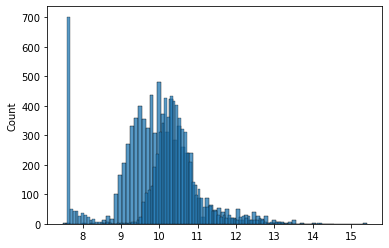

In [66]:
sns.histplot(y_pred)
sns.histplot(y_train)

<AxesSubplot:ylabel='Count'>

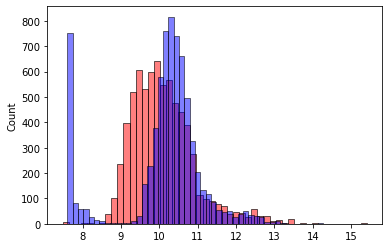

In [67]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50) #alpha is used to control the opacity or to make transparent
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# RMSE (Root Mean Squared Error)

RMSE is used to calculate the Error. The formula is following 

 $ RMSE = \sqrt{\frac{1}{m} \sum\limits _{i=1}^{m} (g(x_i)-y_i)^2} $

$ g(x_i)-y_i$ is the actuall part of squared difference

Which is to find the differnce between pridicted value and actual value.

Then we take the suquare of this difference $(g(x-i)-y_i)^2$

$\frac{1}{m}$ is taking average of the squared error

Finally taking saqure root of all will give us the final value $ \sqrt{\frac{1}{m} \sum\limits _{i=1}^{m}  difference} $

In [68]:
#lets impliment this
def RMSE(y, y_pred):
    error = y - y_pred 
    se = error **2
    mse = se.mean()
    return np.sqrt(mse)

In [69]:
RMSE(y_train, y_pred)

0.7554192603920132

we can short this by using  se= (y-y_pred)**2

# Validating The Model

In the preivous boxes I have trained a $Linear Regression Model$ and applied the training dat to calculate the RMSE. Now I will apply the validation data to test the model

In [70]:
def prepare_x(df):    # Creating a function for preparing the data
    df_num=df[base]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [71]:
#Training Phase  
X_train = prepare_x(df_train)
Wo, w = train_linear_regression(X_train, y_train)   

#Validation Phase
x_val=prepare_x(df_val)
y_pred=Wo+x_val.dot(w)
RMSE(y_val, y_pred)

0.7616530991301591

# Simple Feature Engineering

Here my plan is to imporve the model performance. The value of RMSE is 0.7616 at present. The imporvement will decrease the number (if any). 

In [72]:
# I am looking for the df first 
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


The most importnat column that I missed in training data is year, becuase if the car is older then it is understood the price will be less then the new one. 

In [73]:
# I am checking when the data was collected
df_train.year.max()

2017

In [74]:
# 2017 was the year when data was collected 
2017 - df_train.year.values

array([9, 5, 1, ..., 2, 3, 0], dtype=int64)

Some cars are 9 years old and some are 0 years old. This feature can be handy in predicting the price more precisly. 

In [75]:
# I will the prepare_x function again
def prepare_x(df): 
    df=df.copy()
    df['age'] = 2017 - df.year
    feature = base+['age']
    df_num=df[feature]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [76]:
# The model needs to train gain 
X_train = prepare_x(df_train)
Wo, w = train_linear_regression(X_train, y_train)   

# Now Validating it again 
x_val=prepare_x(df_val)
y_pred=Wo+x_val.dot(w)
RMSE(y_val, y_pred)

0.5172055461058329

Boom !! A little feature engineering yielded the performance increase upto 25 per cent. My model got imporved

Instead of $0.7616$ the new error rate is $0.5172$ 

I am drawing the histplot again

<AxesSubplot:ylabel='Count'>

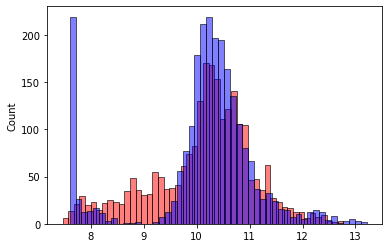

In [77]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50) 
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# Categorical Variables 

There are some columns in the dataset which looks numerical but they are not instead they are categorical. See for example the number of door is a categrical, the value will be always from $2, 3$ or $4$. So this is categorical variable. Because there value is in numeric form so pandas thought it float value. I can use this as well in my training for prediciting the price right. Why this is important now? You now cars with two doors are more expensive than the four door having this feature in training time can increase the performacne while guessing the price. 

In [78]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [79]:
#To use in categorical way I will make a copy of df and three more columuns for numbers of doors. 
#The column will represnt 1 on coresponding value and zero for remaning columns. Let's check it

df_train.number_of_doors == 2


0        True
1       False
2       False
3       False
4       False
        ...  
7145     True
7146     True
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [80]:
# Now it is in True or False form, I'm making it in ones and zeros
(df_train.number_of_doors == 2 ).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int32

In [81]:
# puting it in a function I used previously 
def prepare_x(df): 
    df=df.copy()
    # I didn't want to change my base columns either so copying them
    features=base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] =(df.number_of_doors== v).astype('int')
        features.append('num_doors_%s' % v)
    #feature = base+['age']
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [82]:
prepare_x(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

So I have three new columuns with 1 and 0s endcoding

In [83]:
X_train = prepare_x(df_train)
Wo, w = train_linear_regression(X_train, y_train)   

# Now Validating it again 
x_val=prepare_x(df_val)
y_pred=Wo+x_val.dot(w)
RMSE(y_val, y_pred)

0.5157995641502988

The feature of number of door is not pretty significant in my case, although model showed some improvement but it very very slight. I am trying other features as well.

In [84]:
makes = list(df.make.value_counts().head().index)

In [85]:
# Again adding this into the function for preparing the data

def prepare_x(df): 
    df=df.copy()
    # I didn't want to change my base columns either so copying them
    features=base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] =(df.number_of_doors== v).astype('int')
        features.append('num_doors_%s' % v)
    for v in makes:
        df['make_%s'%v] = (df.make==v).astype('int')
        features.append('make_%s'%v)
        
    #feature = base+['age']
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [86]:
X_train = prepare_x(df_train)
Wo, w = train_linear_regression(X_train, y_train)   

# Now Validating it again 
x_val=prepare_x(df_val)
y_pred=Wo+x_val.dot(w)
RMSE(y_val, y_pred)

0.5076038849555213

Model improved slightly but it is not big change as it was previous 25 percent. 

So, I'm adding categorical more features in training. 

In [87]:
categrical_variables=['make', 'engine_fuel_type', 'transmission_type','driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [88]:
categories = {}  # I will add values in this dictories of above mentioned columns

for c in categrical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [89]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [90]:
def prepare_x(df): 
    df=df.copy()
    # I didn't want to change my base columns either so copying them
    features=base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] =(df.number_of_doors== v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c ,values in categories.items():
        for v in values:
            df['%s_%s'% (c,v)] = (df[c]==v).astype('int')
            features.append('%s_%s'% (c,v))
        
        
    #feature = base+['age']
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [91]:
X_train = prepare_x(df_train)
Wo, w = train_linear_regression(X_train, y_train)   

# Now Validating it again 
x_val=prepare_x(df_val)
y_pred=Wo+x_val.dot(w)
RMSE(y_val, y_pred)

428.2812805730471

Whoa!! it is huge decrease in performance in my model. Something went wrong, to fix this Regularization is required. 

# Regularization 

Rember I used the formula for weights  $w= (X^{T}X)^{-1}X^{T}y$

The problem in my case lies at this $(X^{T}X)^{-1}$ section. 
Sometimes the value of a column is identical to other column in the dataset which prohibts taking inverse of it. 

Like below.

Regularization is process to control the weights so they don't grow too much.

In [92]:
XX=[
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [7,5,5],
]

In [93]:
xx=np.array(XX) #converting it to numpy array
xx

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [7, 5, 5]])

In [94]:
# now taking the dot product first and then the inverse
xxtxx=xx.T.dot(xx)
xxtxx

array([[173, 126, 126],
       [126, 108, 108],
       [126, 108, 108]])

The output of last two columns are the same after taking the transpose, let's take the inverse of it. 

In [96]:
xxtxx_inv=np.linalg.inv(xxtxx)

LinAlgError: Singular matrix

The error is we can't take the inverse of the above matrix because the inverse doesn't exist when the values are identical for the multiple columns.

But in my case this is not the case becuase I didn't received similar while processing this $XTX_inv=np.linalg.inv(XTX)$  in  <font color='blue'>train_linear_regression</font> function. 

##### So, whats wrong??

Sometimes recording the data some noise is also added with actucal value which makes weights bigger. Adding a small value to the diagonals of the w matrix could increase the performance. Let's try

In [97]:
# I will make changes in train_linear_regression function by adding r parameter
def train_linear_regression_reg(X, y, r=0.01):
    
    #Adding the bias term to a given matrix
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    
    #Taking the inverse of Gram Matrix
    XTX=X.T.dot(X)
    XTX= XTX + r * np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    
    #Implementing the full formula to get w
    w_full=XTX_inv.dot(X.T).dot(y)
    
    # This will return bias terms and remaining weights seperately
    return w_full[0], w_full[1: ]

In [98]:
X_train = prepare_x(df_train)
Wo, w = train_linear_regression_reg(X_train, y_train, r=0.01)   

# Now Validating it again 
x_val=prepare_x(df_val)
y_pred=Wo+x_val.dot(w)
RMSE(y_val, y_pred)

0.4565219901277363

Boom !! my model has now imporved considerably by doing regularization.

#### Regualarization is nothing but a process of controlling weights so they grow to much.

But it yields good results as it did in my case. 

# Fine Tuninng The Model 

As $'r'$ of of regularization is affecting the quality of my model. So, I want to find the best value of it by using validation dataset. 

In [103]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 15]: # Providing multiple value of r 
    X_train = prepare_x(df_train)
    Wo, w = train_linear_regression_reg(X_train, y_train, r=r)   

    # Now Validating it again 
    x_val=prepare_x(df_val)
    y_pred=Wo+x_val.dot(w)
    score=RMSE(y_val, y_pred)
    print (r, "   ",score)

0.0     428.2812805730471
1e-05     0.45651697538764
0.0001     0.4565170655112112
0.001     0.4565175088748918
0.01     0.4565219901277363
0.1     0.45656927630172167
1     0.4572204317996273
5     0.4622930016736152
10     0.47014569320990524
15     0.4778577401370087


The value of 0.01 for the r is pretty Ok. So, keeping it as best option. 

In [105]:
r=0.01
X_train = prepare_x(df_train)
Wo, w = train_linear_regression_reg(X_train, y_train, r=r)   

# Now Validating it again 
x_val=prepare_x(df_val)
y_pred=Wo+x_val.dot(w)
score=RMSE(y_val, y_pred)
print (score)

0.4565219901277363


$ RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m} (g(x_i)-y_i)^2} $

$ RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m} (g(x_i)-y_i)^2} $

$ RMSE = \sqrt{\frac{1}{m} \sum\limits _{i=1}^{m} (g(x_i)-y_i)^2} $

$X^{-1}X_w = X^{-1}y$

To get element each other top in latex 
${1 \above 0pt \#}$

$X^{-1} $

$ g(X)=X_w\sim y$